In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve


In [3]:
# verificar o diretorio para poder fazer funcionar o caminho relativo do dataset
import os
print(os.getcwd())

d:\GitHub Desktop\Heart-disease\notebooks


In [4]:
df = pd.read_csv(r'../datasets/heart_disease.csv')


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   9971 non-null   float64
 1   Gender                9981 non-null   object 
 2   Blood Pressure        9981 non-null   float64
 3   Cholesterol Level     9970 non-null   float64
 4   Exercise Habits       9975 non-null   object 
 5   Smoking               9975 non-null   object 
 6   Family Heart Disease  9979 non-null   object 
 7   Diabetes              9970 non-null   object 
 8   BMI                   9978 non-null   float64
 9   High Blood Pressure   9974 non-null   object 
 10  Low HDL Cholesterol   9975 non-null   object 
 11  High LDL Cholesterol  9974 non-null   object 
 12  Alcohol Consumption   7414 non-null   object 
 13  Stress Level          9978 non-null   object 
 14  Sleep Hours           9975 non-null   float64
 15  Sugar Consumption   

In [6]:
df.describe()

,Age,Blood Pressure,Cholesterol Level,BMI,Sleep Hours,Triglyceride Level,Fasting Blood Sugar,CRP Level,Homocysteine Level
count,9971.000000,9981.000000,9970.000000,9978.000000,9975.000000,9974.000000,9978.000000,9974.000000,9980.000000
mean,49.296259,149.757740,225.425577,29.077269,6.991329,250.734409,120.142213,7.472201,12.456271
std,18.193970,17.572969,43.575809,6.307098,1.753195,87.067226,23.584011,4.340248,4.323426
min,18.000000,120.000000,150.000000,18.002837,4.000605,100.000000,80.000000,0.003647,5.000236
25%,34.000000,134.000000,187.000000,23.658075,5.449866,176.000000,99.000000,3.674126,8.723334
50%,49.000000,150.000000,226.000000,29.079492,7.003252,250.000000,120.000000,7.472164,12.409395
75%,65.000000,165.000000,263.000000,34.520015,8.531577,326.000000,141.000000,11.255592,16.140564
max,80.000000,180.000000,300.000000,39.996954,9.999952,400.000000,160.000000,14.997087,19.999037


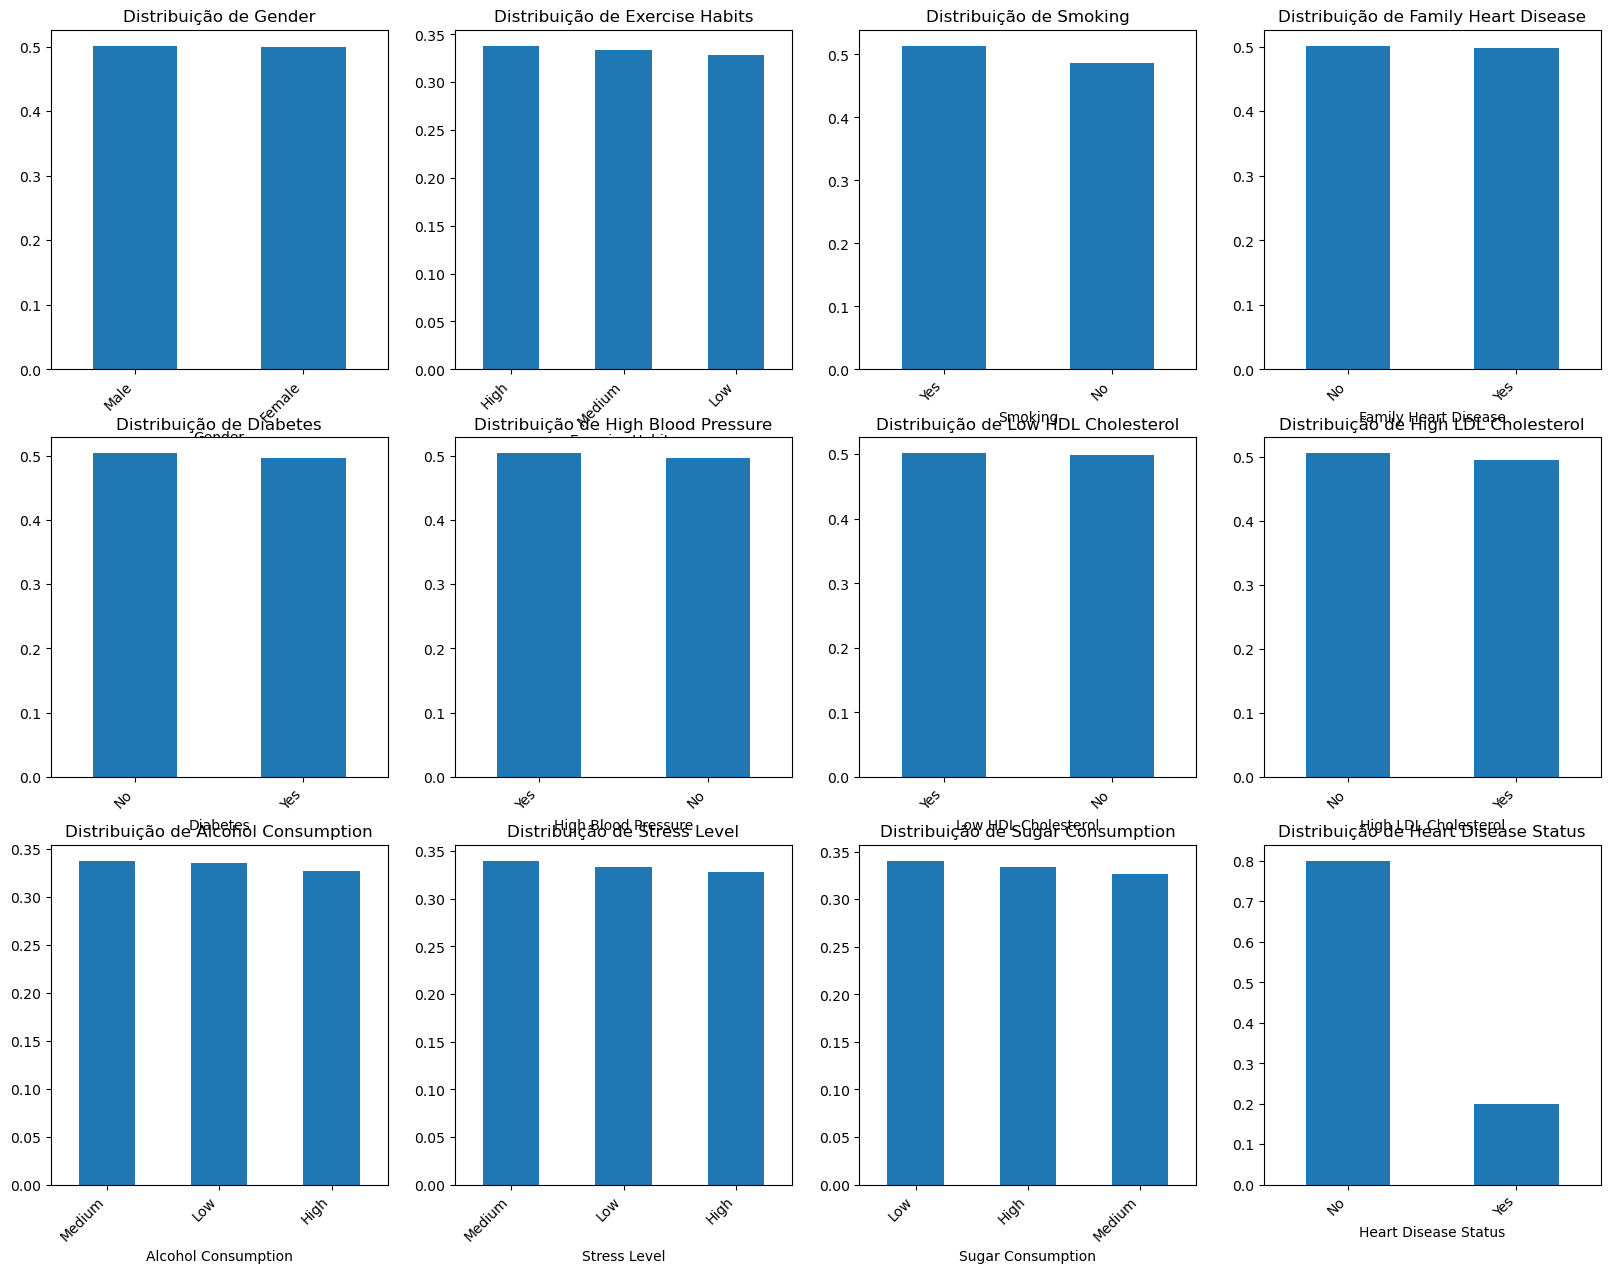

In [7]:
# Distribuição das variáveis categóricas
plt.figure(figsize=(20, 15))
categorical_cols = df.select_dtypes(include=['object']).columns
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 4, i)
    df[col].value_counts(normalize=True).plot(kind='bar')
    plt.title(f'Distribuição de {col}')
    plt.xticks(rotation=45, ha='right')

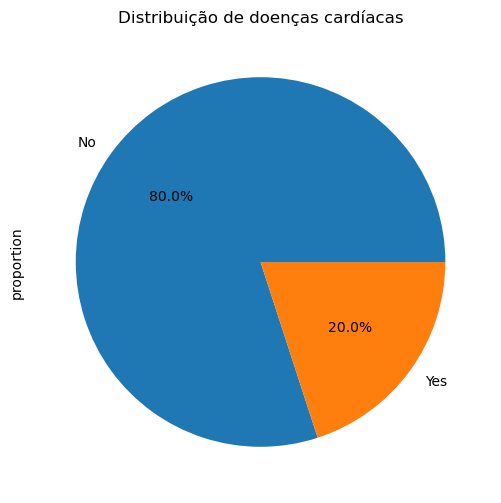

In [8]:
# Distribuição de doenças cardíacas
plt.figure(figsize=(10, 6))
df['Heart Disease Status'].value_counts(normalize=True).plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribuição de doenças cardíacas')
plt.show()

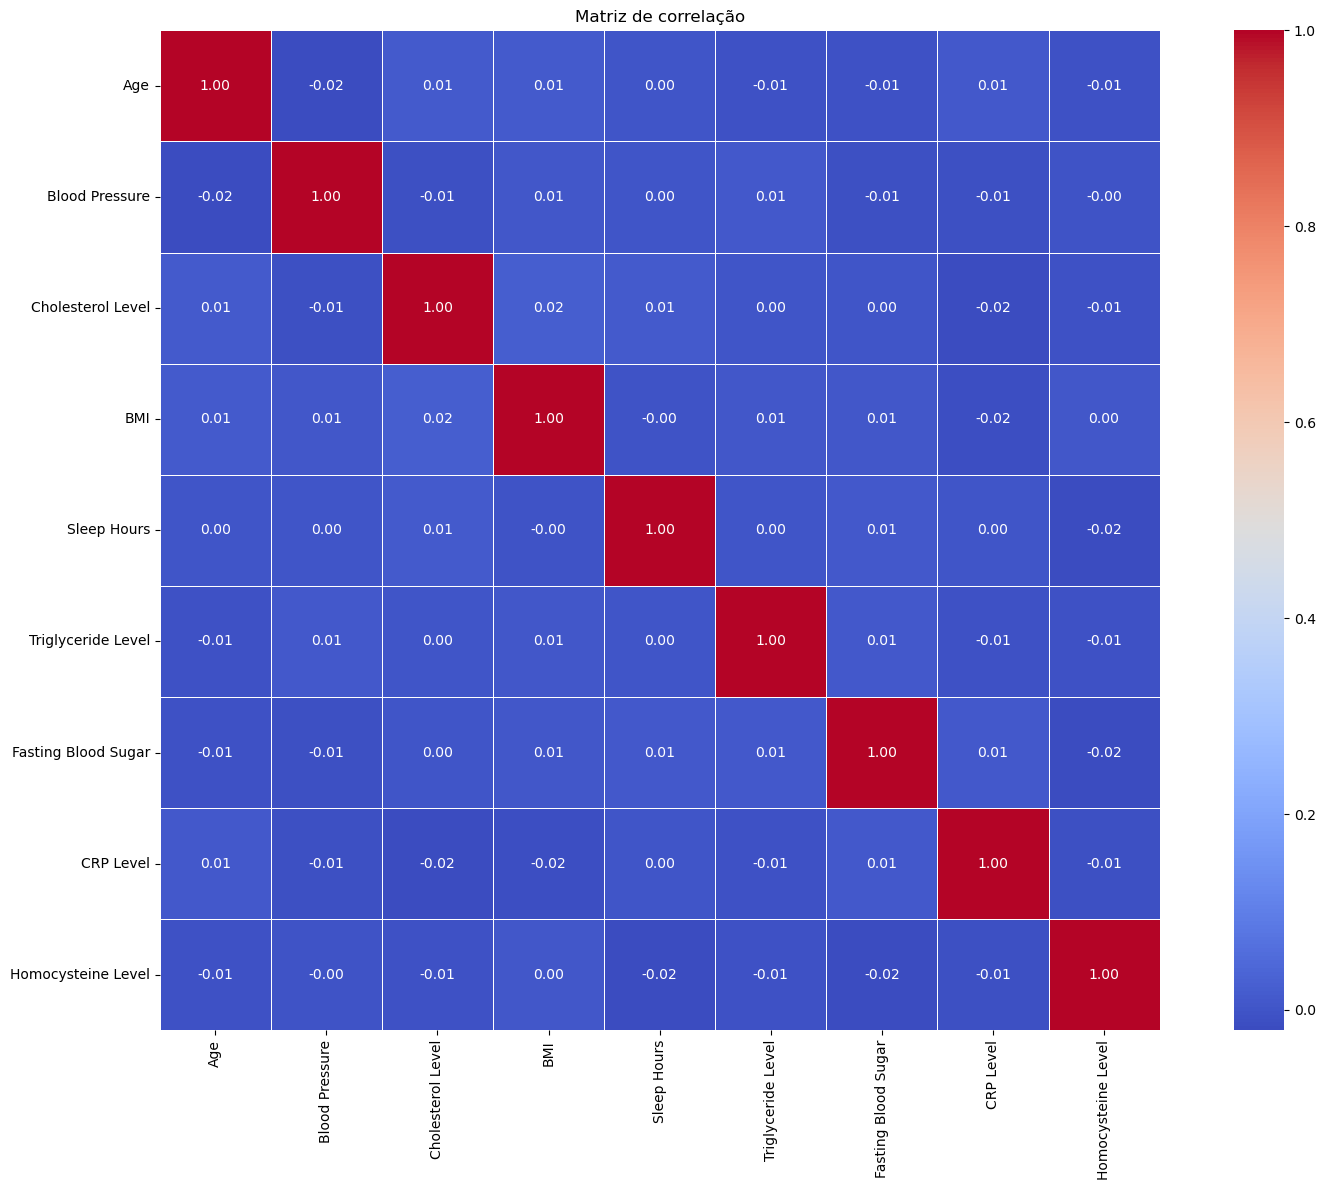

In [10]:
# Análise de correlação
plt.figure(figsize=(16, 12))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", square=True)
plt.title('Matriz de correlação')
plt.tight_layout()
plt.show()

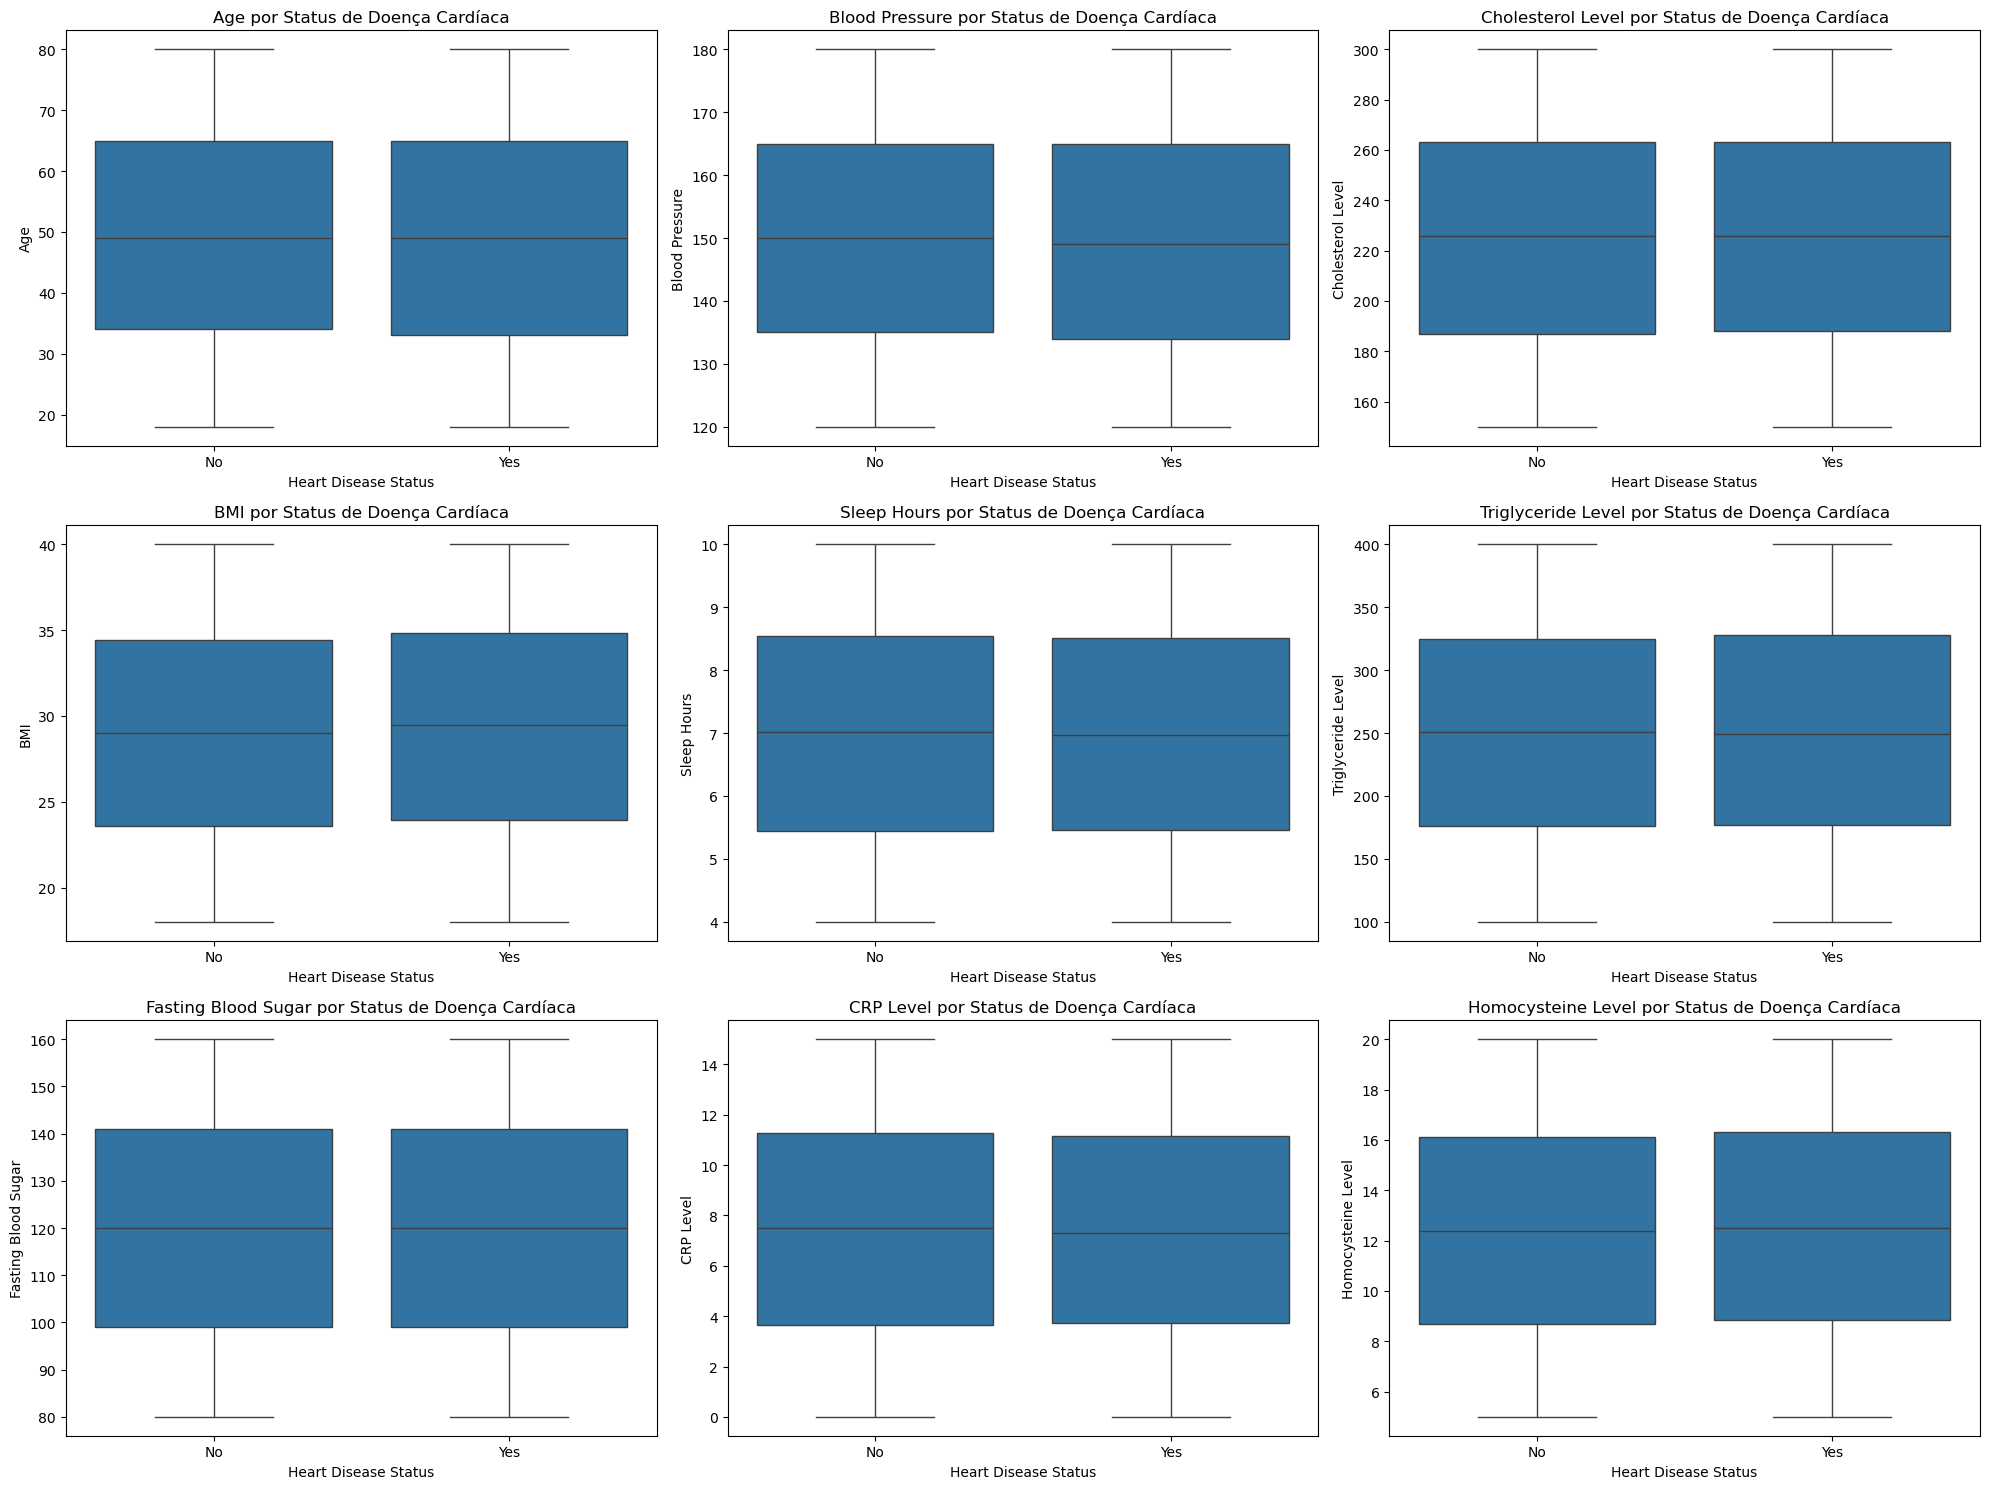

In [11]:
# Boxplots de Variáveis Numéricas por Status de Doença Cardíaca
numeric_features = ['Age', 'Blood Pressure', 'Cholesterol Level', 'BMI', 'Sleep Hours', 
'Triglyceride Level', 'Fasting Blood Sugar', 'CRP Level', 'Homocysteine Level']
plt.figure(figsize=(20, 15))

for i, feature in enumerate(numeric_features, 1):
    plt.subplot(3,3,i)
    sns.boxplot(x = 'Heart Disease Status', y = feature, data=df)
    plt.title(f'{feature} por Status de Doença Cardíaca')

plt.tight_layout()
plt.show()

In [12]:
# Preparação dos Dados para Modelo Preditivo (Pré-processamento de Dados)

le = LabelEncoder()
X = df.copy()

In [ ]:
# Codificar variáveis categóricas

